In [ ]:
!git clone https://github.com/Thehunk1206/Zero-DCE.git

Cloning into 'Zero-DCE'...
remote: Enumerating objects: 373, done.
remote: Counting objects: 100% (372/372), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 373 (delta 171), reused 356 (delta 158), pack-reused 1
Receiving objects: 100% (373/373), 59.22 MiB | 15.51 MiB/s, done.
Resolving deltas: 100% (171/171), done.


In [ ]:
%cd Zero-DCE
!mkdir dataset_v
!mkdir dataset200
!mkdir validate

%cd validate/
!mkdir low
!mkdir high

%cd /content/Zero-DCE

/content/Zero-DCE


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tqdm import tqdm
#import cv2|

In [ ]:
file_path="1.png"
img_raw=tf.io.read_file(file_path)
image=tf.image.decode_png(img_raw,channels=3)
#image
image=tf.image.convert_image_dtype(image,tf.float32)
image=tf.image.resize(image,size=[512,512],method=tf.image.ResizeMethod.BICUBIC)


w=17
row,column,_=image.shape
pad_w=int(w/2)
padding=tf.constant([[pad_w,pad_w],[pad_w,pad_w]])
padded=tf.zeros([row,column,3],dtype=tf.float32)

padded_list=[]
for i in range(3):
  padded_list.append(tf.pad(image[:,:,i],padding,'SYMMETRIC'))
padded=tf.stack(padded_list,axis=-1)
print(padded.shape)

flag=0
row_list=[]
for i in range(row):
  element_list=[]
  for j in range(column):
    element_list.append(tf.reduce_min(padded[i:i+w,j:j+w,:]))
  #print(len(element_list))
  row_list.append(element_list)

print(len(row_list[0]))
print(type(row_list[0]))
print(type(row_list[0][0]))


print(row_list[0][0].dtype)

darkch=row_list[0]
#for i in range(row-1):
 # darkch=tf.stack([darkch,row_list[i+1]],axis=0)
tf.stack([row_list[0],row_list[1]],0)
#print(darkch.shape)


In [ ]:
print(row_list[0][0].dtype)
print(image[0][0].dtype)
print(type(image[0][0]))
print(type(image[0]))
print(0)
###
row_tensor=tf.convert_to_tensor(row_list,dtype=tf.float32)
print(row_tensor.shape)
print(row_tensor[0][0:10])
###

###
row_tensor_list=[]
for i in range(512):
  row_tensor_list.append(tf.convert_to_tensor(row_list[i],dtype=tf.float32))
row_tensor_m=tf.stack(row_tensor_list,axis=1)
print(type(row_tensor))
print(row_tensor[0][0:10])
print(tf.reduce_min(row_tensor))
###
#print(round(row_tensor[0],2)==round(row_tensor_m[0],2))

In [ ]:
dark_added_list=[image[:,:,0],image[:,:,1],image[:,:,2],row_tensor]
image=tf.stack(dark_added_list,axis=-1)

print(tf.reduce_min(image))
print(tf.reduce_max(image))
image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image))

print(image)

In [ ]:
"""Parameters
      Dataset_size=485
      Epoch=60
      learning rate=1e-3
      filters=32
        """

!python train_model.py --dataset_dir dataset_v/ \
                       --model_type zero_dce \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 512 \
                       --IMG_W 512 \
                       --epoch 60\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 8 

Creating dataset pipeline...

Creating Zero-DCE model...

Compiling the model...

[INFO] Summary of model

Model: "DCE-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 32  9248        ['conv2d[0][0]']   

In [ ]:
#img1
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/1.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f79806f4280>
[info] running inference....
[info] inference time: 2557.1277141571045 ms
[info] saved enhanced image to disk


In [ ]:
#img2
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/111.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7fa216ee8280>
[info] running inference....
[info] inference time: 2498.328447341919 ms
[info] saved enhanced image to disk


In [ ]:
#img3
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f2ae6652280>
[info] running inference....
[info] inference time: 2491.76287651062 ms
[info] saved enhanced image to disk


In [ ]:
#img4
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/179.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f28af0f69d0>
[info] running inference....
[info] inference time: 2520.768404006958 ms
[info] saved enhanced image to disk


In [ ]:
#img5
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/79.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f0d0a850280>
[info] running inference....
[info] inference time: 2527.5871753692627 ms
[info] saved enhanced image to disk


In [ ]:
#img6
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/22.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7fcea7ff5280>
[info] running inference....
[info] inference time: 2503.037691116333 ms
[info] saved enhanced image to disk


In [ ]:
#img7
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/23.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f22f7e82fd0>
[info] running inference....
[info] inference time: 2542.128801345825 ms
[info] saved enhanced image to disk


In [ ]:
#img8
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/493.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f363408a910>
[info] running inference....
[info] inference time: 2549.3972301483154 ms
[info] saved enhanced image to disk


In [ ]:
#img9
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/547.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7fc4a54f7280>
[info] running inference....
[info] inference time: 2520.3144550323486 ms
[info] saved enhanced image to disk


In [ ]:
#img10
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/55.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f9c09a80280>
[info] running inference....
[info] inference time: 2512.4330520629883 ms
[info] saved enhanced image to disk


In [ ]:
#img11
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/665.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f7eb4550280>
[info] running inference....
[info] inference time: 2501.5883445739746 ms
[info] saved enhanced image to disk


In [ ]:
#img12
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/669.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f6d92f495e0>
[info] running inference....
[info] inference time: 2554.591178894043 ms
[info] saved enhanced image to disk


In [ ]:
#img13
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/748.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7fdc47db1280>
[info] running inference....
[info] inference time: 2544.1811084747314 ms
[info] saved enhanced image to disk


In [ ]:
#img14
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/778.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f2919e0f580>
[info] running inference....
[info] inference time: 2497.8511333465576 ms
[info] saved enhanced image to disk


In [ ]:
#img15
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_60 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/780.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f8ad66f9280>
[info] running inference....
[info] inference time: 2522.367477416992 ms
[info] saved enhanced image to disk


Text(0.5, 1.0, 'Enhanced')

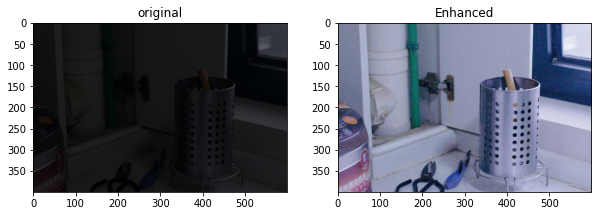

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("validate/low/111.png")
Im_enhanced=Image.open("output/inference/zero_dce_512x512_iter8_60_enhanced_111.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")

#Calaculating PSNR and SSIM

In [ ]:
from skimage import metrics, transform
import cv2
import glob

In [ ]:
psnr=[]
ssim=[]
resize_imghigh=[]
resize_imglow=[]

for img_h in os.listdir("validate/high/"):
  #print(type(img_h))
  img_re=cv2.imread("validate/high/"+img_h)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imghigh.append(res)

for img_l in os.listdir("output/inference/"):
  img_re=cv2.imread("output/inference/"+img_l)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imglow.append(res)



for img_true,img_test in zip(resize_imghigh,resize_imglow):
  psnr.append(metrics.peak_signal_noise_ratio(img_true,img_test))
  ssim.append(metrics.structural_similarity(img_true,img_test,multichannel=True))


In [ ]:
import pandas as pd
metrics_df=pd.DataFrame(list(zip(psnr,ssim)),columns=['PSNR','SSIM'])

In [ ]:
metrics_df

,PSNR,SSIM
0,10.049055,0.196962
1,10.056696,0.324015
2,20.115195,0.717142
3,10.411569,0.330026
4,7.316033,0.172859
5,7.538718,0.190715
6,10.706699,0.299885
7,9.706982,0.196192
8,7.778642,0.124630
9,9.182735,0.201549


#Average PSNR and SSIM value
Average PSNR: 9.83
Average SSIM: 0.26


In [ ]:
#data size of 200 with no DCP
average_psnr=sum(psnr)/len(psnr)
print("Average PSNR:",round(average_psnr,2))

average_ssim=sum(ssim)/len(ssim)
print("Average SSIM:",round(average_ssim,2))

Average PSNR: 9.82
Average SSIM: 0.26


In [ ]:
metrics_df

,PSNR,SSIM
0,10.195539,0.199021
1,10.111068,0.323631
2,20.777436,0.719606
3,10.406855,0.327621
4,7.386689,0.172738
5,7.509849,0.188660
6,10.731902,0.297272
7,9.854415,0.200492
8,7.734963,0.124017
9,9.275149,0.204609


#485 datas with no DCP layer added

In [ ]:
#data size of 485 with no DCP
average_psnr=sum(psnr)/len(psnr)
print("Average PSNR:",round(average_psnr,2))

average_ssim=sum(ssim)/len(ssim)
print("Average SSIM:",round(average_ssim,2))

Average PSNR: 9.9
Average SSIM: 0.26


#training 200 datas with DCP layer added

In [ ]:
"""Parameters
      Dataset_size=200
      Epoch=60
      learning rate=1e-3
      filters=32
        """

!python train_model.py --dataset_dir dataset200/ \
                       --model_type zero_dce \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 512 \
                       --IMG_W 512 \
                       --epoch 60\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 8 

Traceback (most recent call last):
  File "train_model.py", line 35, in <module>
    from ZeroDCE.dataset_copy import TfdataPipeline
ModuleNotFoundError: No module named 'ZeroDCE.dataset_copy'


In [ ]:
psnr=[]
ssim=[]
resize_imghigh=[]
resize_imglow=[]

for img_h in os.listdir("validate/high/"):
  #print(type(img_h))
  img_re=cv2.imread("validate/high/"+img_h)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imghigh.append(res)

for img_l in os.listdir("output/inference/"):
  img_re=cv2.imread("output/inference/"+img_l)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imglow.append(res)



for img_true,img_test in zip(resize_imghigh,resize_imglow):
  psnr.append(metrics.peak_signal_noise_ratio(img_true,img_test))
  ssim.append(metrics.structural_similarity(img_true,img_test,multichannel=True))

In [ ]:
import pandas as pd
metrics_df=pd.DataFrame(list(zip(psnr,ssim)),columns=['PSNR','SSIM'])

In [ ]:
metrics_df

,PSNR,SSIM
0,10.050952,0.196805
1,10.057564,0.323954
2,20.116568,0.717068
3,10.415314,0.329990
4,7.321095,0.172656
5,7.540411,0.190579
6,10.660203,0.298726
7,9.710820,0.196344
8,7.782159,0.124588
9,9.157976,0.200747


In [ ]:
average_psnr=sum(psnr)/len(psnr)
print("Average PSNR:",round(average_psnr,2))

average_ssim=sum(ssim)/len(ssim)
print("Average SSIM:",round(average_ssim,2))

Average PSNR: 9.82
Average SSIM: 0.26


#**MOdifying with DCP channel**

In [ ]:
%cd ZeroDCE

/content/Zero-DCE/ZeroDCE


In [ ]:
!touch dataset_copy.py

In [ ]:
%cd /content/Zero-DCE/

/content/Zero-DCE


In [ ]:
"""Parameters
      Dataset_size=485
      Epoch=60
      learning rate=1e-3
      filters=32
        """

!python train_model.py --dataset_dir dataset_v/ \
                       --model_type zero_dce \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 512 \
                       --IMG_W 512 \
                       --epoch 60\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 8 

Text(0.5, 1.0, 'DCP_Enhanced')

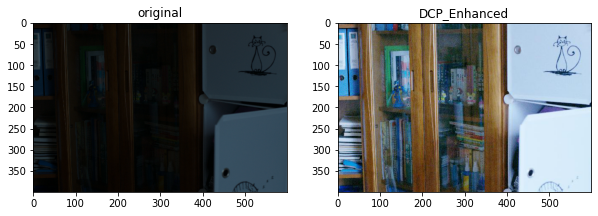

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("validate/low/1.png")
Im_enhanced=Image.open("output/inference/zero_dce_512x512_iter8_60_enhanced_1.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("DCP_Enhanced")

In [ ]:
from skimage import metrics, transform
import cv2
import glob

In [ ]:
psnr=[]
ssim=[]
resize_imghigh=[]
resize_imglow=[]

for img_h in os.listdir("validate/high/"):
  #print(type(img_h))
  img_re=cv2.imread("validate/high/"+img_h)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imghigh.append(res)

for img_l in os.listdir("output/inference/"):
  img_re=cv2.imread("output/inference/"+img_l)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imglow.append(res)



for img_true,img_test in zip(resize_imghigh,resize_imglow):
  psnr.append(metrics.peak_signal_noise_ratio(img_true,img_test))
  ssim.append(metrics.structural_similarity(img_true,img_test,multichannel=True))

In [ ]:
#with 485 dataset
metrics_df=pd.DataFrame(list(zip(psnr,ssim)),columns=['PSNR','SSIM'])
metrics_df

,PSNR,SSIM
0,10.202060,0.199280
1,10.107487,0.323265
2,20.807501,0.719195
3,10.413174,0.328577
4,7.401412,0.172742
5,7.512689,0.188285
6,10.743461,0.297510
7,9.861350,0.200513
8,7.741849,0.124052
9,9.274031,0.204075


In [ ]:
average_psnr_DCP=sum(psnr)/len(psnr)
print("Average PSNR:",round(average_psnr_DCP,2))

average_ssim_DCP=sum(ssim)/len(ssim)
print("Average SSIM:",round(average_ssim_DCP,2))

Average PSNR: 9.84
Average SSIM: 0.26


#with 485 datas

In [ ]:
#with 485 dataset and DCP
metrics_df=pd.DataFrame(list(zip(psnr,ssim)),columns=['PSNR','SSIM'])
metrics_df

,PSNR,SSIM
0,10.202060,0.199280
1,10.107487,0.323265
2,20.807501,0.719195
3,10.413174,0.328577
4,7.401412,0.172742
5,7.512689,0.188285
6,10.743461,0.297510
7,9.861350,0.200513
8,7.741849,0.124052
9,9.274031,0.204075


In [ ]:
#With DCP channel added
average_psnr_DCP=sum(psnr)/len(psnr)
print("Average PSNR:",round(average_psnr_DCP,2))

average_ssim_DCP=sum(ssim)/len(ssim)
print("Average SSIM:",round(average_ssim_DCP,2))

Average PSNR: 9.91
Average SSIM: 0.26


In [ ]:
dark=[[[1,1],[2,2]],[[3,3],[4,4]],[[5,5],[6,6]],[[0,0],[1,1]]]

In [ ]:
output=tf.stack(dark,axis=-1)

In [ ]:
output

<tf.Tensor: shape=(2, 2, 4), dtype=int32, numpy=
array([[[1, 3, 5, 0],
        [1, 3, 5, 0]],

       [[2, 4, 6, 1],
        [2, 4, 6, 1]]], dtype=int32)>

In [ ]:
a = tf.constant([
  [[9, 2], [3, 4]],
  [[0, 2], [3, 4]]
])
r=tf.reduce_min(a)
print(a[:,:,0])

tf.Tensor(
[[9 3]
 [0 3]], shape=(2, 2), dtype=int32)


In [ ]:
row=2
column=3
for index in np.ndindex((column, row)):
    print(index)

(0, 0)
(0, 1)
(1, 0)
(1, 1)
(2, 0)
(2, 1)


In [ ]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
paddings = tf.constant([[1, 1,], [2, 2]])

In [ ]:
#for i in range(2)
t=tf.pad(t, paddings, "SYMMETRIC")
t

<tf.Tensor: shape=(4, 7), dtype=int32, numpy=
array([[2, 1, 1, 2, 3, 3, 2],
       [2, 1, 1, 2, 3, 3, 2],
       [5, 4, 4, 5, 6, 6, 5],
       [5, 4, 4, 5, 6, 6, 5]], dtype=int32)>

In [ ]:
t1 = [[1, 2, 3], [4, 5, 6]]
t2 = [[7, 8, 9], [10, 11, 12]]
t3=[[9,9,9],[10,10,10]]
t=tf.concat([t1, t2], 0)
t4=tf.concat([t,t3],0)
t4

<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [ 9,  9,  9],
       [10, 10, 10]], dtype=int32)>